<a href="https://colab.research.google.com/github/solanki1993/Covid19-India-Analysis-and-forecasting-using-FbProphet/blob/main/Covid19_India_Analysis_and_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd

In [3]:
state_df = pd.read_csv('/content/StatewiseTestingDetails.csv')
country_df = pd.read_csv('/content/covid_19_india.csv')
vaccine_df = pd.read_csv('/content/covid_vaccine_statewise.csv')

In [4]:
state_df.tail()

,Date,State,TotalSamples,Negative,Positive
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN
16335,2021-08-10,West Bengal,16162814.0,NaN,NaN


In [5]:
state_df[state_df['State']=='West Bengal'].head()

,Date,State,TotalSamples,Negative,Positive
15843,2020-04-01,West Bengal,659.0,568,37.0
15844,2020-04-04,West Bengal,1042.0,NaN,NaN
15845,2020-04-06,West Bengal,1301.0,NaN,NaN
15846,2020-04-07,West Bengal,1487.0,NaN,NaN
15847,2020-04-09,West Bengal,1889.0,NaN,NaN


In [6]:
state_df[state_df['State']=='West Bengal'].tail()

,Date,State,TotalSamples,Negative,Positive
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN
16335,2021-08-10,West Bengal,16162814.0,NaN,NaN


In [8]:
country_df[((country_df['Date']=='2020-04-04')&(country_df['State/UnionTerritory']=='West Bengal'))]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
647,648,2020-04-04,6:00 PM,West Bengal,-,-,3,3,69


In [10]:
#we have records starting Jan 2020 to 8th May 2021.
print("Minimum date :",country_df['Date'].min())
print("Maximum date :",country_df['Date'].max())

Minimum date : 2020-01-30
Maximum date : 2021-08-11


In [11]:
df=country_df.copy()

In [12]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


Date, Time, State/UnitonTerritory ConfirmedIndianNational, ConfirmedForignNational are in Categorical value.

In [14]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [15]:
#lets convert the Date feature to Date&time datatype
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

#Time is not required as it doesnt make much difference
df.drop(['Time'],axis=1, inplace=True)

#Renaming State/UnionTerritory to States for easy reference
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [16]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [17]:
df[df['States']=='West Bengal'].tail()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
17965,17966,2021-08-07,West Bengal,-,-,1503535,18202,1532379,10642
18001,18002,2021-08-08,West Bengal,-,-,1504326,18217,1533128,10585
18037,18038,2021-08-09,West Bengal,-,-,1505089,18229,1533803,10485
18073,18074,2021-08-10,West Bengal,-,-,1505808,18240,1534360,10312
18109,18110,2021-08-11,West Bengal,-,-,1506532,18252,1534999,10215


**Exploratory data  analysis + Feature Engineering**

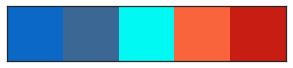

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

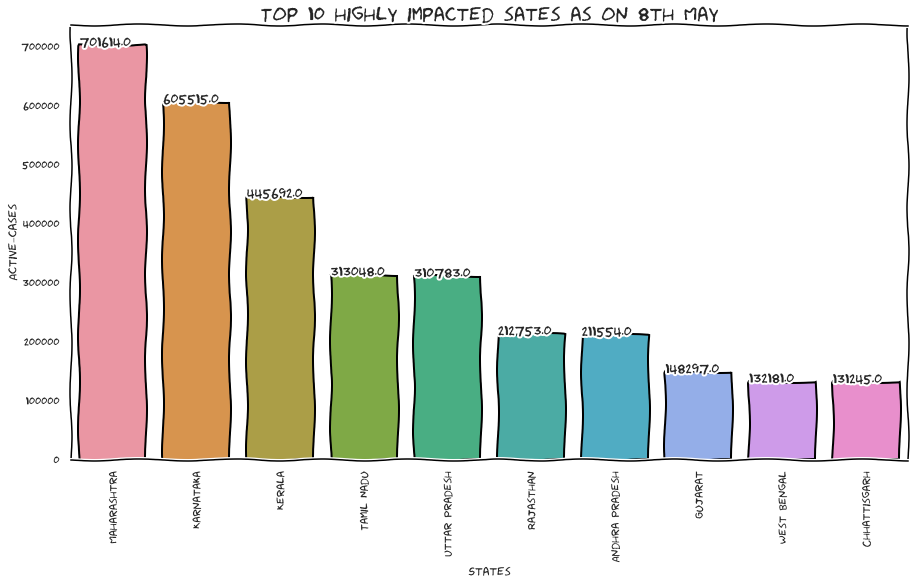

In [19]:
top_10=df.groupby(by='States').max()[['Active_cases','Date']].sort_values(by=['Active_cases'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Top 10 highly impacted sates as on 8th May", size=20)
    ax=sns.barplot(data=top_10.iloc[:10],y='Active_cases',x='States', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

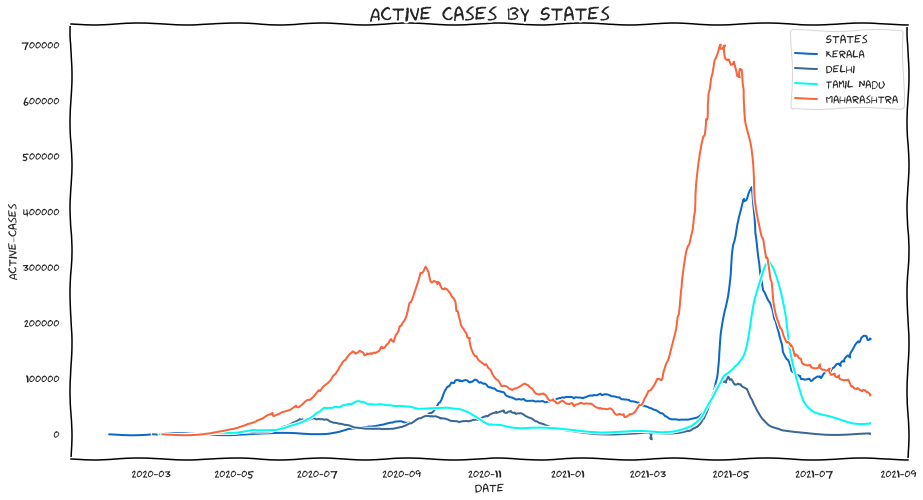

In [20]:
fig=plt.figure(figsize=(15,8))
with plt.xkcd():
    ax=sns.lineplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Date',y='Active_cases',hue='States')
    ax.set_title("Active cases by States", size=20)

Maharastra has highes number cases since july 2020.

IndexError: ignored

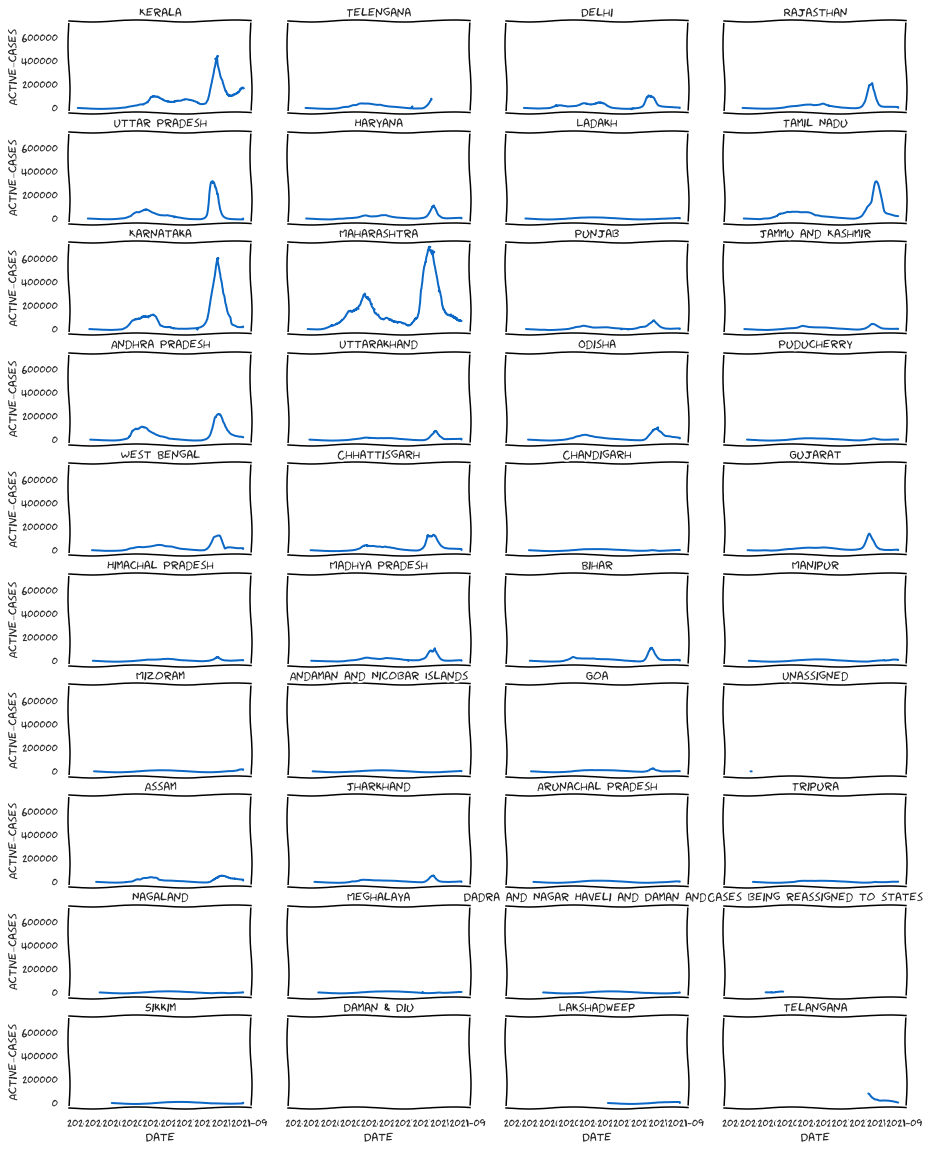

In [21]:
with plt.xkcd():
    fig, ax=plt.subplots(nrows=10, ncols=4, figsize=[15,20], sharex=True, sharey=True)
    ax=ax.flatten()

    for i,s in enumerate(df['States'].unique()):
        data1=df[df['States']==s][['Date','Active_cases']]
        sns.lineplot(data=data1, x='Date',y='Active_cases', ax=ax[i])
        ax[i].set_title(s)

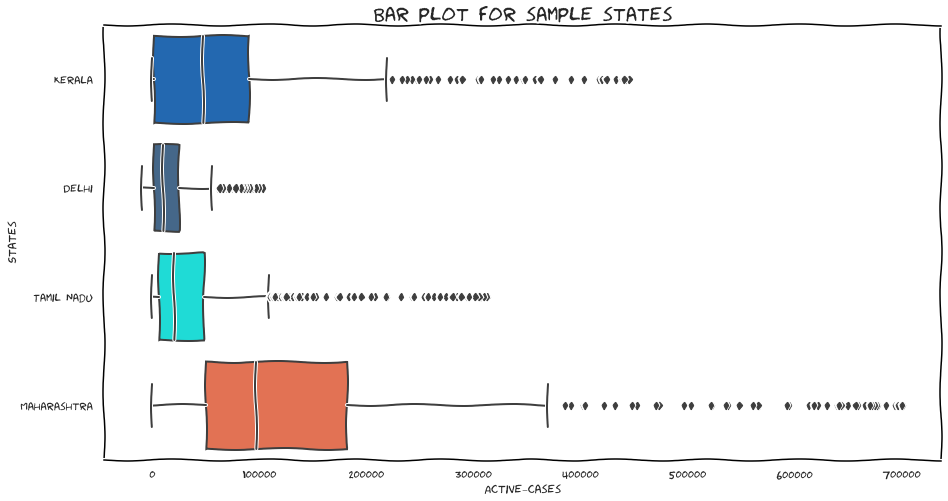

In [22]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Active_cases',y='States')
    plt.title("Bar plot for sample states" ,size=20)

In [23]:
median_states=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])]
median_states.groupby(by=['States']).median().style.bar(['Active_cases'])

,Sno,Cured,Deaths,Confirmed,Active_cases
States,,,,,
Delhi,8617.500000,463755.500000,8100.000000,513934.000000,10110.000000
Kerala,8065.500000,368848.000000,1573.000000,455388.000000,46928.500000
Maharashtra,8733.500000,1652928.500000,46638.000000,1782284.500000,96548.000000
Tamil Nadu,8726.000000,745848.000000,11605.000000,769995.000000,20407.000000


Observation:

Maharastra - Most of the times Active cases stays between 50000, 190000 range and the range went upto 35000+. mdeian is around 83K cases
Kerala - Active cases ranging from 0 to less than 100000. Median is around 40. median value is around 24K
Tamilnadu - Avtive cases in Tamilnadu ranging less than 50,000. Median is around 12K

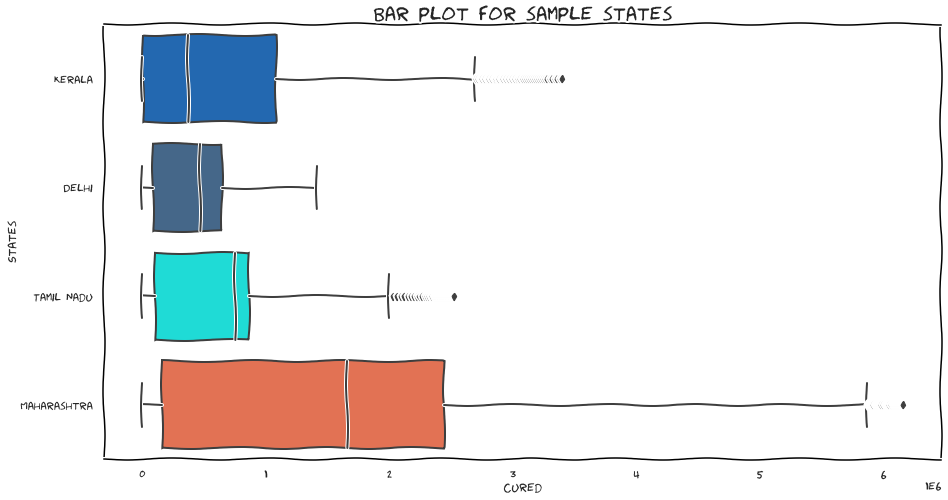

In [24]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Cured',y='States')
    plt.title("Bar plot for sample states" ,size=20)

In [25]:
median_states.groupby(by=['States']).median().style.bar(['Cured'])

,Sno,Cured,Deaths,Confirmed,Active_cases
States,,,,,
Delhi,8617.500000,463755.500000,8100.000000,513934.000000,10110.000000
Kerala,8065.500000,368848.000000,1573.000000,455388.000000,46928.500000
Maharashtra,8733.500000,1652928.500000,46638.000000,1782284.500000,96548.000000
Tamil Nadu,8726.000000,745848.000000,11605.000000,769995.000000,20407.000000


Observation:

Maharastra - has high range of cured value as well.
Kerala - is in 3rd place for cured count
Tamilnadu - is in 2nd place in the sample in terms of cure.
but, we can't conclude the rate by count. we will do some testing

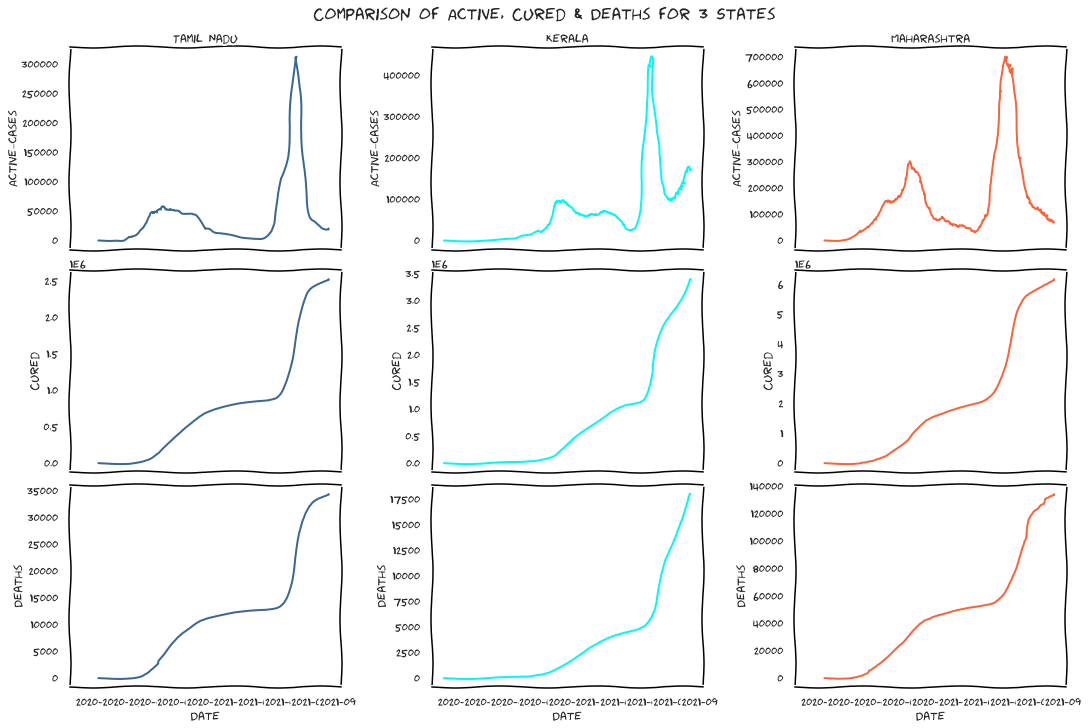

In [26]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
    plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")
    sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
    ax[0,0].set_title("Tamil Nadu")
    sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
    sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

    sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
    ax[0,1].set_title("Kerala")
    sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
    sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

    sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
    ax[0,2].set_title("Maharashtra")
    sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
    sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


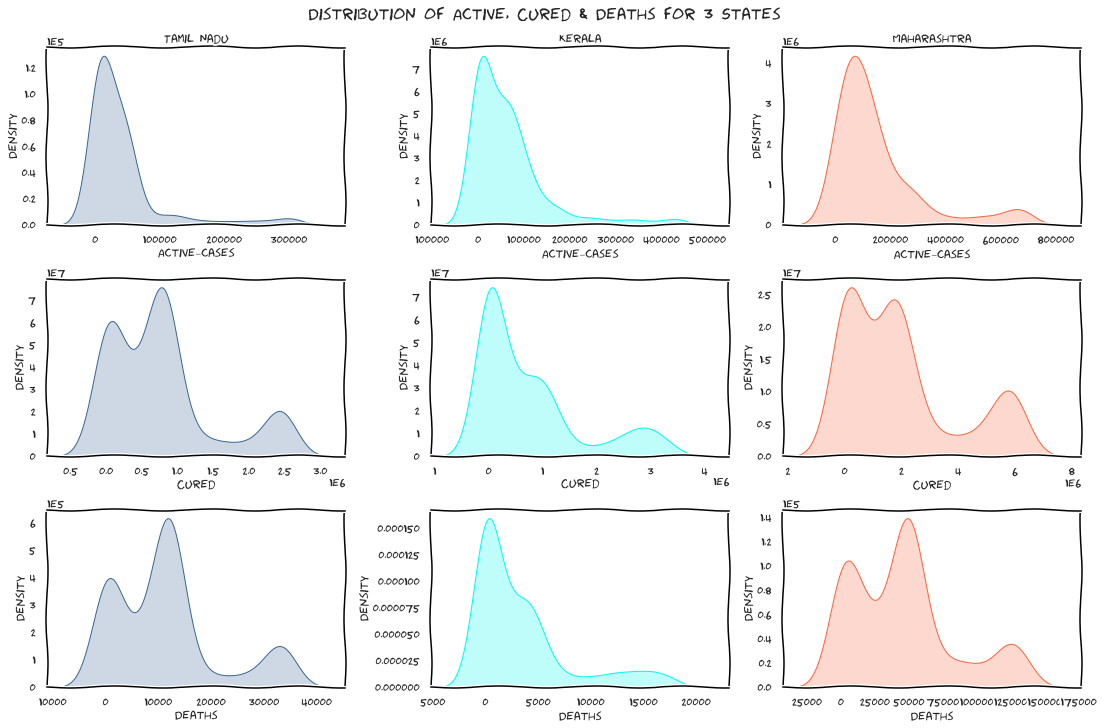

In [27]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=False, sharey=False, constrained_layout=True )
    plt.suptitle("Distribution of Active, Cured & Deaths for 3 States")
    sns.kdeplot(data=tn['Active_cases'],ax=ax[0,0],color=colors[1], fill=True)
    ax[0,0].set_title("Tamil Nadu")
    sns.kdeplot(data=tn['Cured'],  ax=ax[1,0],color=colors[1],fill=True)
    sns.kdeplot(data=tn['Deaths'], ax=ax[2,0], color=colors[1],fill=True)

    sns.kdeplot(data=kl['Active_cases'], ax=ax[0,1], color=colors[2],fill=True)
    ax[0,1].set_title("Kerala")
    sns.kdeplot(data=kl['Cured'], ax=ax[1,1], color=colors[2],fill=True)
    sns.kdeplot(data=kl['Deaths'], ax=ax[2,1], color=colors[2],fill=True)

    sns.kdeplot(data=mh['Active_cases'], ax=ax[0,2], color=colors[3],fill=True)
    ax[0,2].set_title("Maharashtra")
    sns.kdeplot(data=mh['Cured'], ax=ax[1,2], color=colors[3],fill=True)
    sns.kdeplot(data=mh['Deaths'], ax=ax[2,2], color=colors[3],fill=True)

**Statistical Testing**

In [28]:
#Cure rate Testing

tn=df[df['States']=='Tamil Nadu']['Cured']
mh=df[df['States']=='Maharashtra']['Cured']
kl=df[df['States']=='Kerala']['Cured']

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Null Hypothesis**


H0 - mean of states cure rate are significant H1 - mean of states cure rate are not significant

Significant rate: 0.05

In [29]:
st,p_value=ttest_ind(tn,kl)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

st,p_value=ttest_ind(tn,mh)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))

st,p_value=ttest_ind(kl,mh)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Maharashtra'))

Both states Tamil Nadu & Kerala have no significant difference in Cure rate
Both states Tamil Nadu & Maharashtra have significant difference in Cure rate
Both states Kerala & Maharashtra have significant difference in Cure rate


In [30]:
#Proportion Test

tn_cured = df[df['States']=='Tamil Nadu']['Cured'].max()
mh_cured=df[df['States']=='Maharashtra']['Cured'].max()
kl_cured=df[df['States']=='Kerala']['Cured'].max()

tn_active = df[df['States']=='Tamil Nadu']['Confirmed'].max()
mh_active=df[df['States']=='Maharashtra']['Confirmed'].max()
kl_active=df[df['States']=='Kerala']['Confirmed'].max()

In [31]:
print([tn_cured, mh_cured] , [tn_active, mh_active])
print(f' Proportion of cured cases in Tamil Nadu, Maharastra = {round(tn_cured/tn_active,2)}%, {round(mh_cured/mh_active,2)}% respectively \n')

print([tn_cured, kl_cured] , [tn_active, kl_active])
print(f' Proportion of cured cases in Tamil Nadu, Kerala = {round(tn_cured/tn_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

print([mh_cured, kl_cured] , [mh_active, kl_active])
print(f' Proportion of cured cases in Tamil Nadu, Kerala = {round(mh_cured/mh_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

[2524400, 6159676] [2579130, 6363442]
 Proportion of cured cases in Tamil Nadu, Maharastra = 0.98%, 0.97% respectively 

[2524400, 3396184] [2579130, 3586693]
 Proportion of cured cases in Tamil Nadu, Kerala = 0.98%, 0.95% respectively 

[6159676, 3396184] [6363442, 3586693]
 Proportion of cured cases in Tamil Nadu, Kerala = 0.97%, 0.95% respectively 



In [32]:
stat, p_value = proportions_ztest([tn_cured, mh_cured] , [tn_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, mh_cured] , [kl_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Maharashtra'))

Both states Tamil Nadu & Maharashtra have significant difference in Cure rate
Both states Tamil Nadu & Kerala have significant difference in Cure rate
Both states Kerala & Maharashtra have significant difference in Cure rate


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


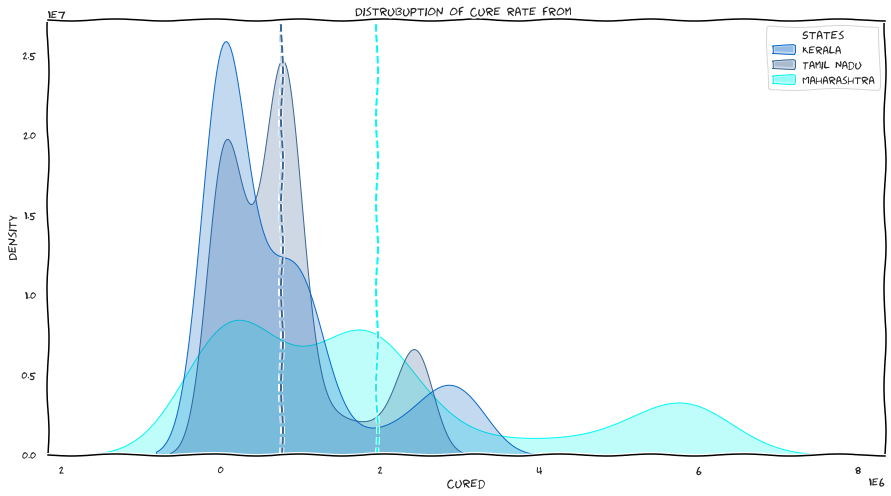

In [33]:
from scipy.stats import norm
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Distrubuption of Cure rate from ")
    ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Tamil Nadu','Maharashtra','Kerala'])],x='Cured', hue='States', fill=True)
    ax.axvline(median_states[median_states['States']=='Kerala']['Cured'].mean(), ls='--', c=colors[0])
    ax.axvline(median_states[median_states['States']=='Tamil Nadu']['Cured'].mean(), ls='--', c=colors[1])
    ax.axvline(median_states[median_states['States']=='Maharashtra']['Cured'].mean(), ls='--', c=colors[2])

In [34]:
tn_cured = df[df['States']=='Tamil Nadu']['Deaths'].max()
mh_cured=df[df['States']=='Maharashtra']['Deaths'].max()
kl_cured=df[df['States']=='Kerala']['Deaths'].max()

tn_active = df[df['States']=='Tamil Nadu']['Confirmed'].max()
mh_active=df[df['States']=='Maharashtra']['Confirmed'].max()
kl_active=df[df['States']=='Kerala']['Confirmed'].max()

print([tn_cured, mh_cured] , [tn_active, mh_active])
print(f' Proportion of Death cases in Tamil Nadu, Maharastra = {round(tn_cured/tn_active,2)}%, {round(mh_cured/mh_active,2)}% respectively \n')

print([tn_cured, kl_cured] , [tn_active, kl_active])
print(f' Proportion of Death cases in Tamil Nadu, Kerala = {round(tn_cured/tn_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

print([mh_cured, kl_cured] , [mh_active, kl_active])
print(f' Proportion of Death cases in Tamil Nadu, Kerala = {round(mh_cured/mh_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')


stat, p_value = proportions_ztest([tn_cured, mh_cured] , [tn_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Tamil Nadu','Maharashtra'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, mh_cured] , [kl_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Kerala','Maharashtra'))

[34367, 134201] [2579130, 6363442]
 Proportion of Death cases in Tamil Nadu, Maharastra = 0.01%, 0.02% respectively 

[34367, 18004] [2579130, 3586693]
 Proportion of Death cases in Tamil Nadu, Kerala = 0.01%, 0.01% respectively 

[134201, 18004] [6363442, 3586693]
 Proportion of Death cases in Tamil Nadu, Kerala = 0.02%, 0.01% respectively 

Both states Tamil Nadu & Maharashtra have significant difference in Death rate
Both states Tamil Nadu & Kerala have significant difference in Death rate
Both states Kerala & Maharashtra have significant difference in Death rate


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


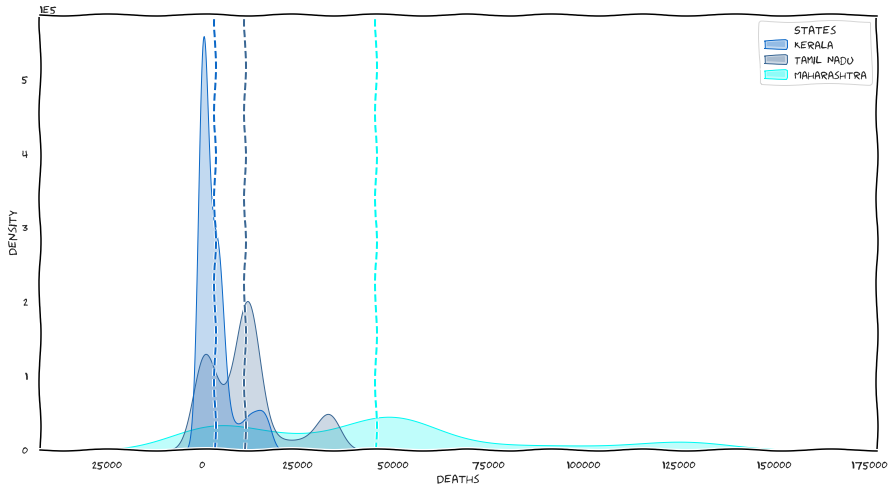

In [35]:
from scipy.stats import norm
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Tamil Nadu','Maharashtra','Kerala'])],x='Deaths', hue='States', fill=True)
    ax.axvline(median_states[median_states['States']=='Kerala']['Deaths'].mean(), ls='--', c=colors[0])
    ax.axvline(median_states[median_states['States']=='Tamil Nadu']['Deaths'].mean(), ls='--', c=colors[1])
    ax.axvline(median_states[median_states['States']=='Maharashtra']['Deaths'].mean(), ls='--', c=colors[2])

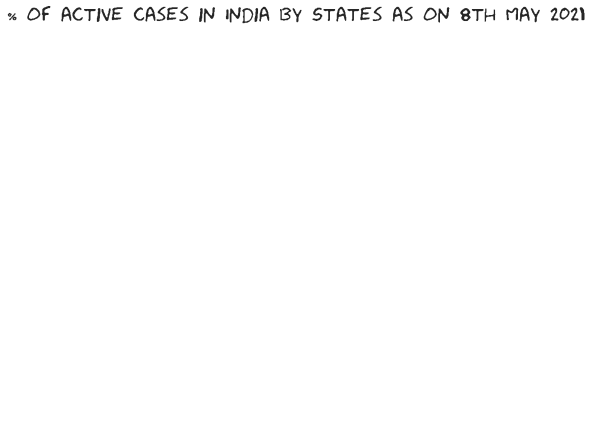

In [37]:
with plt.xkcd():
    fig=plt.figure(figsize=(7,7))
    plt.pie(x=top_10[top_10['Date']=='2021-05-08 00:00:00']['Active_cases'], labels=top_10[top_10['Date']=='2021-05-08 00:00:00']['States'], autopct='%.2f',radius=1.5);
    plt.suptitle("% of active cases in India by States as on 8th May 2021",size=20)

In [43]:
#Finding our Daily cases for the data

tn_count=df[df['States']=='Tamil Nadu']
daily=[]
daily.append(0)
for i in range(1, len(tn_count)):
    daily.append(tn_count['Confirmed'].iloc[i]-tn_count['Confirmed'].iloc[i-1])
tn_count['Daily']=daily

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
from fbprophet import Prophet
ds=pd.DataFrame(columns=['ds','y'])

ds['ds']=tn_count['Date']
ds['y']=tn_count['Daily']
model = Prophet(changepoint_range=1)
model.fit(ds)
future = model.make_future_dataframe(periods=20)
f=model.predict(future)
f['ds']=pd.to_datetime(f['ds'], format='%Y-%m-%d')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


TypeError: ignored

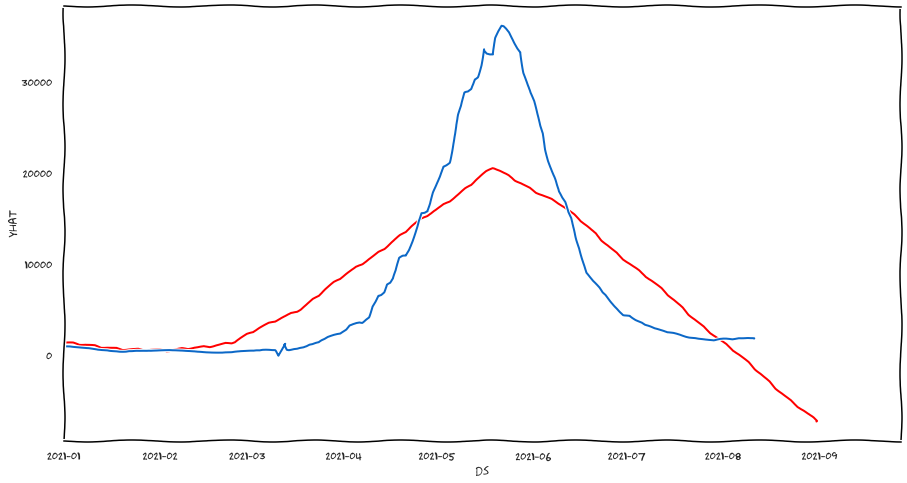

In [45]:
today=f[f['ds']=='2021-05-11 00:00:00']
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    
        
    ax=sns.lineplot(data=f, x='ds',y='yhat', alpha=1, color='red')
    ax=sns.lineplot(data=tn_count, x='Date',y='Daily')
    ax.set_xlim(mtd.datestr2num('2021-01-01'))
    
    ax.annotate(text=str(np.round(f['yhat'].iloc[-1],0))+ "\n"+ str(f['ds'].iloc[-1]), xy=(f['ds'].iloc[-1],f['yhat'].iloc[-1]))
    ax.annotate(text=str(np.round(today['yhat'].iloc[-1],0))+ "\n"+ str(today['ds'].iloc[-1]), xy=(today['ds'].iloc[-1],today['yhat'].iloc[-1]))
    
    ax.annotate(text="2021 Lock down in TamilNadu", xy=(0.70,0.25), xycoords='figure fraction', xytext=(0.60, 0.15),arrowprops={'arrowstyle':'-|>','color':'black'})
    ax.axvspan(xmin='2021-05-10 00:00:00', xmax='2021-05-24 00:00:00', alpha=0.2, facecolor='y')
    
    ax.legend(labels=['Predicted','Actual'], loc='upper left')